<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8.1. Deep Learning MLP</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [1]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [2]:
display(HTML(html_h4('Realizo la importacion a Dataframe de los datos de los csv creados en la etapa de Prepocessing. ','purple')))

datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_seg1_standarizado, datosEEG_seg2_standarizado, datosEEG_seg3_standarizado, datosEEG_seg4_standarizado, datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'segmento_1':datosEEG_seg1_standarizado, 'segmento_2':datosEEG_seg2_standarizado, 'segmento_3':datosEEG_seg3_standarizado,'segmento_4':datosEEG_seg4_standarizado, 'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)

 # MLP Cassifier

In [3]:

# Defino los rangos de parámetros para MLP
param_grid_mlp = {
    'alpha': np.linspace(0.00001, 0.1, 10),  # Rango de valores para alpha
    'hidden_layer_sizes': [(50,), (100,), (200,), (500,), (1000,)]  # Rango de valores para neuronas en la capa oculta
}

model_MLP = MLPClassifier(max_iter=MAX_ITERACIONES)
grid_search_mlp = GridSearchCV(model_MLP, param_grid_mlp, cv=10)

In [5]:
accuracy_score_mlp = []
accuracy_score_test_mlp =[]
matriz_confusion_mlp = []
matriz_confusion_test_mlp = []

for dataset in datosEEG_all:
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataset)
        
    # Entrenar modelo
    grid_search_mlp.fit(X_train, y_train)
    best_model = grid_search_mlp.best_estimator_   
    print(grid_search_mlp.best_params_)
     
    # predict de X_Val
    y_predict_model = best_model.predict(X_val)    
    accuracy_score_mlp.append(accuracy_score(y_val, y_predict_model))       
    matriz_confusion_mlp.append(confusion_matrix(y_val, y_predict_model))
    
    
    # predict de X_test
    y_predict_model_test = best_model.predict(X_test)
    accuracy_score_test_mlp.append(accuracy_score(y_test, y_predict_model_test))
    matriz_confusion_test_mlp.append(confusion_matrix(y_test, y_predict_model_test))


{'alpha': 0.1, 'hidden_layer_sizes': (100,)}
{'alpha': 0.1, 'hidden_layer_sizes': (50,)}
{'alpha': 0.011120000000000001, 'hidden_layer_sizes': (200,)}
{'alpha': 0.1, 'hidden_layer_sizes': (100,)}
{'alpha': 1e-05, 'hidden_layer_sizes': (50,)}
{'alpha': 0.03334000000000001, 'hidden_layer_sizes': (50,)}


,MLP
Segmento 1,0.545455
Segmento 2,0.333333
Segmento 3,0.312500
Segmento 4,0.133333
All Segmentos after,0.307692
All Segmentos before,0.346154


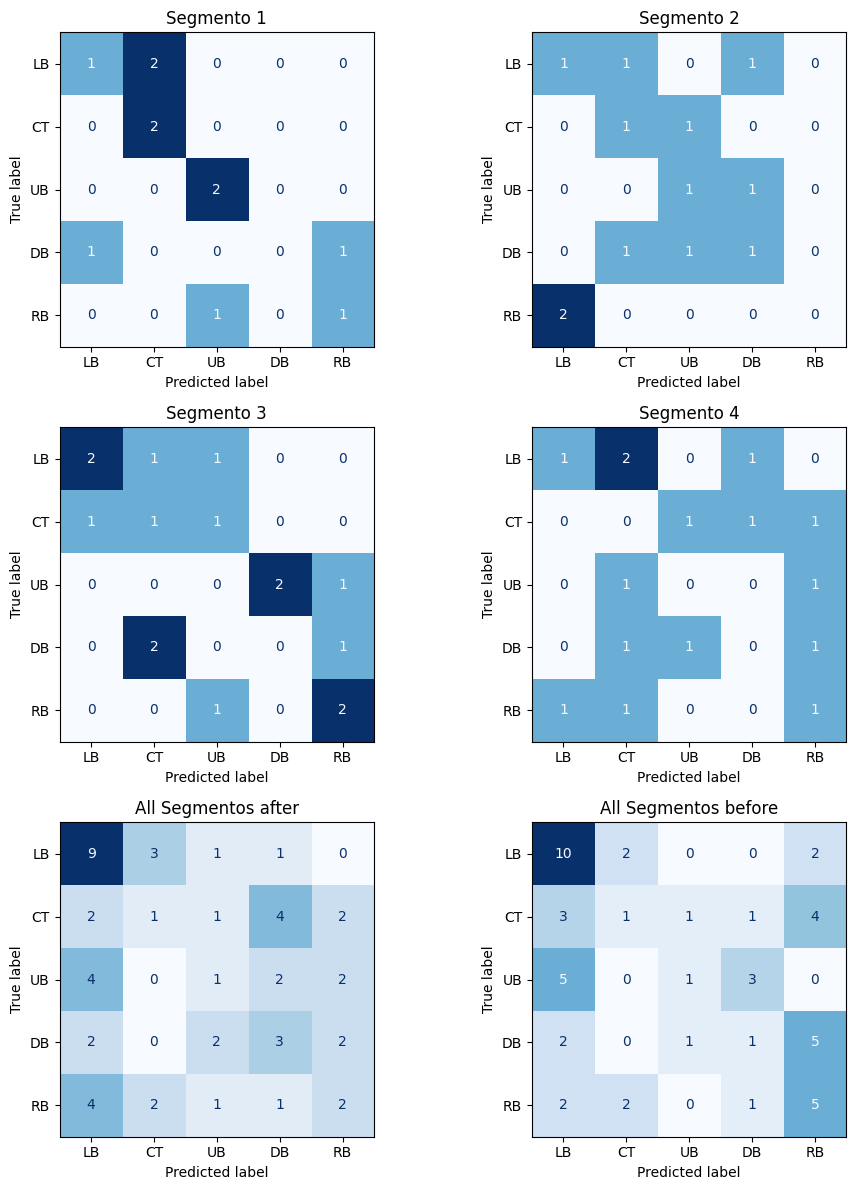

In [6]:
datos_mlp = pd.DataFrame(accuracy_score_mlp, columns=['MLP'], index=(titulos_all))

display(datos_mlp)

mc_mlp = []

for matrices_mlp in matriz_confusion_mlp:

    mc_mlp.append(pd.DataFrame(matrices_mlp, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en seis subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_mlp[0], mc_mlp[1], mc_mlp[2], mc_mlp[3], mc_mlp[4], mc_mlp[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()
